# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur adjoint au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>


# TD2 - Régression linéaire

Ce TD concerne la régression linéaire (Chapitre 2 du cours). À la fin de ce TD, vous devriez être avoir été en mesure de
- Estimer les coefficients des paramères de régression avec la méthode des moindres carrés.
- Valider les hypothèeses de régression à l'aide de l'analyse des résidus.
- Tester l'importance de la régression.
- Calculer des intervalles de confiances sur les coefficients et sur les prévisions.
- Vérifier la présence de multicolinéarité. 

Pour les deux premiers exercices, je vous suggère de ne utiliser la librairie GLM pour bien comprendre tous les concepts. La librairie GLM peut être utilisée pour le troisième exercice.

In [477]:
function SST_(Y)
    Ȳ = mean(Y)
    return sum((Y .- Ȳ).^2)
end

function SSR_(Ŷ, Ȳ)
    return sum((Ŷ .- Ȳ).^2)
end

function SSE_(Y, Ŷ)
    e = Y .- Ŷ
    return sum(e.^2)
end

function Rₐⱼ²_(SSR, n, p, SST)
    return  1 - (SSE / (n - p)) / (SST / (n - 1))
end

function Rₚᵣₑ²_(SST, Y, Ŷ)
    e = Y .- Ŷ
    return  1 - (sum(e.^2))/SST
end

Rₚᵣₑ²_ (generic function with 1 method)

In [478]:
# Chargement des librairies
using CSV, DataFrames, Gadfly, Statistics, LinearAlgebra

In [6]:
x = collect(1,100)


MethodError: MethodError: no method matching collect(::Int64, ::Int64)
Closest candidates are:
  collect(!Matched::Type{T}, ::Any) where T at array.jl:519
  collect(::Any) at array.jl:560

# Exercice 1 - Pourcentage de gras

Le pourcentage de gras est un indice de forme physique d'un individu. Or, la mesure de cet indice est assez difficile. Elle requiert l'immersion complète de l'individu dans un cylindre gradué rempli d'eau. 

Par conséquent, on souhaite savoir si on peut prédire le pourcentage de gras $Y$ avec trois mesures beaucoup plus simples à obtenir :

$x_1$ : l'épaisseur des plis de la peau des triceps (en mm) ;<br/>
$x_2$ : le tour de cuisse (en mm) ;<br/>
$x_3$ : la circonférence du bras en (mm).<br/>

Les mesures du fichier *bodyfat.csv* proviennent de 20 femmes en bonne santé, âgées entre 20 et 34 ans. 

In [479]:
# Chargement des données
data = CSV.read("bodyfat.csv")
first(data,5)

,Triceps,Thigh,Midarm,Bodyfat
,Float64,Float64,Float64,Float64
1,19.5,43.1,29.1,11.9
2,24.7,49.8,28.2,22.8
3,30.7,51.9,37.0,18.7
4,29.8,54.3,31.1,20.1
5,19.1,42.2,30.9,12.9


In [480]:
typeof(data)

DataFrame

## a) Affichage du pourcentage de graisse en fonction du tour de cuisse

Tracer le nuage de points du pourcentage de graisse en fonction de $x_2$, le tour de cuisse. Est-ce qu'une relation linéaire semble appropriée ?

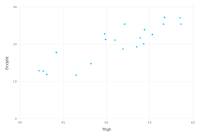

In [481]:
plot(data, x=:Thigh, y=:Bodyfat)

In [482]:
println("Oui, une relation lineaire semble appropriee.")

Oui, une relation lineaire semble appropriee.


## b) Estimation des paramètres de la régression linéaire simple

Estimez lez paramètres du modèle de régression linéaire entre le pourcentage de graisse et $x_2$, le tour de cuisse.

In [483]:
x₂ = data[:, :Thigh]
y = data[:, :Bodyfat]
ȳ = mean(y)
x̄ = mean(x₂)

n = length(x₂)


β̂₁ = sum( (x₂[i] - x̄)*(y[i] - ȳ) for i=1:n) / sum( (x₂[i] - x̄)^2 for i=1:n )

β̂₀ = ȳ - β̂₁ * x̄;

println("β̂₀ = $β̂₀")
println("β̂₁ = $β̂₁")

β̂₀ = -23.634489130309518
β̂₁ = 0.85654659234531


## c) Affichage de la droite de régression obtenue

Superposez au nuage de points précédent la droite de régression estimée.

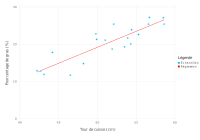

In [484]:
x̂₂ = collect(range(minimum(x₂),stop=maximum(x₂), length=length(x₂)))
ŷ = β̂₀ .+ β̂₁ * x̂₂;

#plot(x=x̂₂, y=ŷ)
sample = layer( x=x₂, y=y, Geom.point, Theme(default_color="deepskyblue"))
regression = layer( x=x̂₂, y=ŷ, Geom.line, Theme(default_color="red"))

plot(sample,regression,
    Guide.manual_color_key("Légende", ["Échantillon", "Régression"], ["deepskyblue","red"]),
    Guide.xlabel("Tour de cuisse (cm)"), Guide.ylabel("Pourcentage de gras (%)"))

## d) Calul du $R^2$ ajusté et du $R^2$ de prévision.

Calculez pour le modèle de régression linéaire simple défini en (b) :
- le $R^2$ ajusté ;
- le $R^2$ de prévision.

In [485]:
# prevision
x₂ = convert(Array{Float64},data[!,:Thigh])
ŷ = β̂₀ .+ β̂₁ * x₂


e = y - ŷ


SST = sum( (y[i] - ȳ)^2 for i=1:n)
println("SST = $SST")
SSE = sum( (e).^2)
println("SSE = $SSE")
SSR = sum( (ŷ[i] - ȳ)^2 for i=1:n)

# nombre de variables explicatives
p = 1
R²ₐⱼ = 1 - (SSE / (n - p)) / (SST / (n - 1))

println("R²ₐⱼ = $R²ₐⱼ")
R²ₐⱼ = R²ₐⱼ * 100
println("On explique environ $R²ₐⱼ% de la variance des resultats")

SST = 495.3894999999999
SSE = 113.42368224930945
R²ₐⱼ = 0.7710414083275696
On explique environ 77.10414083275697% de la variance des resultats


In [486]:
X = hcat(ones(n), x₂)

H = X/(X'*X)*X'

h = diag(H)

ẽ = e./(1 .-h)

R²ₚᵣₑᵥ = 1 - sum(ẽ.^2)/SST

0.7286143986212001

In [487]:
println("R²ₚᵣₑᵥ = $R²ₚᵣₑᵥ")
println("Nous sommes tres proche de la valeur parfait de 1 avec $R²ₚᵣₑᵥ ")

R²ₚᵣₑᵥ = 0.7286143986212001
Nous sommes tres proche de la valeur parfait de 1 avec 0.7286143986212001 


## e) Vérification de la multicolinéarité 

Si toutes les variables explicatives sont utilisées, vérifiez s'il y a présence de multicolinéarité.

In [488]:
function check_multicol(X::Array{T,2} where T<:Real)
   
    # Attention, la matrice de structure X ne doit pas avoir une colonne de uns pour utiliser cette fonction
    n = size(X,1)
    if X[:,1] == ones(n)
        @error "Pour tester la multicolinéarité, la matrice de structure ne devrait pas avoir une colonne de 1."
    end
    
    # Standardisation des colonnes de X
    m = mean(X, dims=1)
    s = std(X, dims=1)
    
    X̃ = (X .- m) ./s
    
    # Calcul des valeurs singulières
    λ = svdvals(X̃)
    # Calculer les valeurs singulières de X est plus efficace que calculer les valeurs propres de X'X
    
    # Calcul de l'indice de multicolinéarité
    ϕ = maximum(λ) / minimum(λ)
    
    if ϕ > 30
        multicol = true
    else
        multicol = false
    end
    
    return multicol
end

check_multicol (generic function with 1 method)

In [489]:
data = CSV.read("bodyfat.csv")

names(data)

x₁ = data[:, :Triceps]
x₂ = data[:, :Thigh]
x₃ = data[:, :Midarm]
Y = data[:, :Bodyfat]

n = length(Y)

X = hcat(x₁, x₂, x₃)# Creation de l'array d'arrays

if check_multicol(X)
    println("Il y a collinearite")
else
    println("Il n'y a pas collinearite")
end

Il y a collinearite


## f) Régression avec l'épaisseur du pli du triceps et la circonférence du bras

Estimez les paramètres du modèle de régression utilisant l'épaisseur du pli du triceps et la circonférence du bras comme variables explicatives.

In [490]:
# Trouvons les trois β
X = hcat(ones(n), x₁, x₃) # matrice de structure

β̂  = (X'*X)\(X'*Y)
βₒ= β̂[1]
β₁ = β̂[2]
β₂ = β̂[3]
println(" Nous obtenons βₒ= $βₒ, β₁ = $β₁ et β₂ = $β₂ ")

 Nous obtenons βₒ= 6.7916274124420175, β₁ = 1.0005849091217052 et β₂ = -0.43144201802196813 


## g) Validation des hypothèses de la régression

Tracez les résidus en fonction des prévisions. Est-ce que les hypothèses de la régression semblent satisfaites ?

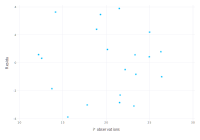

In [491]:
ŷ = X*β̂  # nos previsions

e = y - ŷ # les residus

plot(x=ŷ, y=e, 
    Guide.xlabel("iᵉ observations"), Guide.ylabel("Residu"))

Elle repond a l'hypopthese 1 de linearite. 

Elle repond a l'hypopthese 2 d' homoscédasticité.

On en peut rien conclure sur l'hypopthese 3 d' indépendance.

## h) Calul du $R^2$ ajusté et du $R^2$ de prévision.

Calculez pour le modèle de régression linéaire simple défini en (f) :
- le $R^2$ ajusté ;
- le $R^2$ de prévision.

In [492]:
Y = data[:, :Bodyfat] # les vrais donnees
Ȳ = mean(Y) # leur moyenne
Ŷ = X*β̂  # nos meilleurs previsions

SST = sum((Y .- Ȳ).^2) # la variabilite totale
SSR = sum((Ŷ .- Ȳ).^2) # la variabilite expliquee
SSE = sum((Y .- Ŷ).^2) # la variabilite residuelle

n = length(Y) # nombre d'observations
p = 2 # nombre de variables explicatives

Rₐⱼ² = 1 - (SSE/(n-p)/(SST/(n-1))) # bon pour etablir un  lien

e = Y .- Ŷ # residus

H = X/(X'*X)*X'

h = diag(H)

ẽ = e./(1 .-h)

R²ₚᵣₑᵥ = 1 - sum(ẽ.^2)/SST

println("Rₐⱼ² = $Rₐⱼ²")

println("R²ₚᵣₑᵥ = $R²ₚᵣₑᵥ")

Rₐⱼ² = 0.7742798394106004
R²ₚᵣₑᵥ = 0.7005720068318497


Le Rₐⱼ² tres proche de 0, montre que nos variable n'explique pas beaucoup la variabilite des resultats.

Au contraitre le R²ₚᵣₑᵥ nous montre que notre modele est bon pour predire de nouvelles observations.

## i) Sélection de modèle

Lequel des modèles définis en (b) et (f) est le meilleur ? Justifiez.

Sa depend de ce que l'on veut faire du modele.
Si on veut s'en servir pour prouver un lien entre la variable le tour de
cuisse et le pourcentage de gras il faudrait mieu prendre le premier
modele, mais au contraire si l'on veut predire le pourcentage de gras d'un 
induvidu mieux vaut le second modele.

Ça dépend du critère. Si on intéressé à la prévision, alors le meilleur modèle est celui utilisant uniquement le tour de cuisse car son $R^2$ de prévision est supérieur.


# Exercice 2 - Notes de MTH2302B


Le jeu de données *notes.csv}* compile les notes obtenues aux deux contrôles périodiques et au final des 91 étudiants inscrits dans mes sections du cours MTH2302B pour les sessions A2017 et H2018. Durant la session d'automne, la majorité des étudiants provenait de génie chimique et génie biomédical tandis qu'à la session d'hiver, les étudiant provenaient majoritairement de génie mécanique et de génie aérospatial.

On souhaite déterminer s'il existe une relation linéaire entre la note au final ($Y$) et la note au premier contrôle ($X_1$) et la note au deuxième contrôle ($X_2$).


In [493]:
# Chargement des librairies
using CSV, DataFrames, Gadfly, Statistics, LinearAlgebra, Distributions

In [494]:
# Chargement des données
data = CSV.read("notes.csv"; copycols=true)
first(data,5)

,CP1,CP2,Final,Session
,Float64,Float64,Float64,String
1,13.75,16.5,27.75,A2017
2,9.5,11.5,14.25,A2017
3,11.0,10.25,22.75,A2017
4,10.75,13.0,26.0,A2017
5,10.75,6.5,22.0,A2017


## a) Estimation des paramètres du modèle de régression

Estimez les paramètres du modèle de régression :
$$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon.$$

In [495]:
x₁ = data[:, :CP1]
x₂ = data[:, :CP2]
y = data[:, :Final]

n = length(y)

X = hcat(ones(n), x₁, x₂)

β = (X'*X)\(X'*y)

β₀ = β[1]
β₁ = β[2]
β₂ = β[3]

println("β₀ = $β₀ ")
println("β₁ = $β₁ ")
println("β₂ = $β₂ ")

β₀ = 12.224032934946086 
β₁ = 0.31297174542620615 
β₂ = 0.6112804788597583 


## b) Validation des hypothèses de la régression

Validez les hypothèses de la régression avec le graphique des résidus

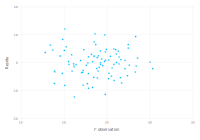

In [496]:
ŷ = X*β
e = y - ŷ

plot(x=ŷ, y=e, Guide.xlabel("iᵉ observation"), Guide.ylabel("Residu"))

Oui, les deux hypotheses semblent respectees.

## c) Test sur l'importance de la régression

Testez au seuil de 5% si au moins une des variables explicatives possède un pouvoir prédictif significatif.

In [497]:
ȳ = mean(y)

p = 2

SST = sum((y .- ȳ).^2)
SSR = sum((ŷ .- ȳ).^2)
SSE = sum(e.^2)

F₀ = (SSR/p)/(SSE/(n-p-1));

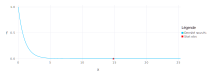

In [498]:
xx = 0:.1:100
pd = FDist(p, n-p-1) 
f = pdf.(pd,xx)

density= layer(x=xx, y=f, Geom.line, Theme(default_color="deepskyblue"))
statObs = layer(x=[F₀], y=[0], Geom.point, Theme(default_color="red") )

Gadfly.set_default_plot_size(21cm, 8cm)
plot(density, statObs,
    Guide.manual_color_key("Légende", ["Densité sous H₀", "Stat obs"], ["deepskyblue","red"]),
    Coord.Cartesian(xmin=0,xmax=25, ymin=0, ymax=1), Guide.xlabel("x"), Guide.ylabel("f"))

In [499]:
α = 0.05
seuil_observe = ccdf(pd, F₀) 

if seuil_observe < α
    println(" On doit rejeter l'hypothese que H₀. Il y a au moins une variable
        qui possede un pouvoir predictif sur Y")
    println(seuil_observe, "<", α)
else
    println(" On doit considerer que H₀ est vrai: aucune varaible n'explique 
        la variable aleatoire Y")
    println(seuil_observe, ">", α)
end


 On doit rejeter l'hypothese que H₀. Il y a au moins une variable
        qui possede un pouvoir predictif sur Y
2.7711655070283817e-6<0.05


## d) Est-ce que la session à laquelle les étudiants étaient inscrits joue un rôle  significatif ?

In [500]:
data = CSV.read("notes.csv"; copycols=true)
first(data)

x₁ = data[!, :CP1]
x₂ = data[!, :CP2]
Y = data[!, :Final]

Ȳ = mean(Y)

n = size(data, 1)

# transformation de la variable qualitative
x₃ = zeros(n)
index = data[!, :Session] .== "A2017"
x₃[index] .= 0

index = data[!, :Session] .== "H2018"
x₃[index] .= 1

# creation de la matrice des superposants

X = hcat(ones(n), x₁, x₂, x₃)

β = (X'*X)\(X'*Y)

Ŷ = X*β

SSR = SSR_(Ŷ, Ȳ)
SST = SST_(Y, Ȳ)

R² = SSR/SST
println("La valeur de R²= $R² avec la variable qualitative")

La valeur de R²= 0.3076754477942961 avec la variable qualitative


In [501]:
# intervalles de confiance pour le modele a trois variables explicatives
X = hcat(ones(n), x₁, x₂, x₃)

β̂ = (X'X)\X'Y

e = Y.-X*β̂

σ² = 1/(n-p-1)*sum(e.^2)
C = inv(X'X)

for i=1:4
    lower_bound = -sqrt(σ²*C[i,i])*cdf(TDist(n-p-1), .975)+β[i] 
    upper_bound = sqrt(σ²*C[i,i])*cdf(TDist(n-p-1), .975)+β[i]
    println("β$(i-1) = $(β[i]) avec une interval de confiance de 95% 
        [$lower_bound, $upper_bound]")
end

β0 = 13.706094637032312 avec une interval de confiance de 95% 
        [11.775799045089542, 15.636390228975081]
β1 = 0.32186037955603636 avec une interval de confiance de 95% 
        [0.1898432748462079, 0.45387748426586483]
β2 = 0.6137879296359798 avec une interval de confiance de 95% 
        [0.5018199764622147, 0.725755882809745]
β3 = -2.684850769519379 avec une interval de confiance de 95% 
        [-3.5291308050625396, -1.840570733976218]


Toutes les variables sont significatives

In [502]:
X = hcat(ones(n), x₁, x₂)

β = (X'*X)\(X'*Y)

Ŷ = X*β

SSR = SSR_(Ŷ, Ȳ)
SST = SST_(Y, Ȳ)

R² = SSR/SST
println("La valeur de R²= $R² sans la variable qualitative")

println("Puisqu'il y a une augmentation du R². L'ajout de la variable qualitative
a un impacte predictif sur leur note au final")

La valeur de R²= 0.2523525193672423 sans la variable qualitative
Puisqu'il y a une augmentation du R². L'ajout de la variable qualitative
a un impacte predictif sur leur note au final


## e) Prévision de la note au final.

Supposons qu'un étudiant ait obtenu les notes de $13/20$ et de $15/20$ respectivement aux deux premiers contrôles périodiques:

 - $x_1 = 13/20$;
 - $x_2 = 15/20$.

Obtenez les estimations de sa note au final s'il était inscrit à la session A2017 et s'il était inscrit à la session H2018.

In [503]:
# etudiant a l'automne 2017 
x₀ = [1 13/20 15/20 0]

x₁ = data[!, :CP1]
x₂ = data[!, :CP2]
Y = data[!, :Final]

Ȳ = mean(Y)

n = size(data, 1)
p = 3

# transformation de la variable qualitative
x₃ = zeros(n)
index = data[!, :Session] .== "A2017"
x₃[index] .= 0

index = data[!, :Session] .== "H2018"
x₃[index] .= 1

# creation de la matrice des superposants

X = hcat(ones(n), x₁, x₂, x₃)

β̂ = (X'*X)\(X'*Y)

e = Y.-X*β̂

σ² = 1/(n-p-1)*sum(e.^2)

tₐ = cdf(TDist(n-p-1), .975)

Ŷ₀ = x₀*β̂

lower_bound = -tₐ*(σ²*(1 .+x₀*inv(X'*X)*x₀')).^1/2+Ŷ₀
upper_bound = tₐ*(σ²*(1 .+x₀*inv(X'*X)*x₀')).^1/2+Ŷ₀

println("La prediction pour l'etudiant a l'automne 2017 est de $Ŷ₀
    avec un interval de confiance a 95% = [$lower_bound, $upper_bound]")

# etudiant a l'hiver 2018
x₀ = [1 13/20 15/20 1]

Ŷ₀ = x₀*β̂

lower_bound = -tₐ*(σ²*(1 .+x₀*inv(X'*X)*x₀')).^1/2+Ŷ₀
upper_bound = tₐ*(σ²*(1 .+x₀*inv(X'*X)*x₀')).^1/2+Ŷ₀

println("La prediction pour l'etudiant a l'hiver 2018 est de $Ŷ₀
    avec un interval de confiance a 95% = [$lower_bound, $upper_bound]")

La prediction pour l'etudiant a l'automne 2017 est de [14.375644830970721]
    avec un interval de confiance a 95% = [[2.933338700801439], [25.817950961140003]]
La prediction pour l'etudiant a l'hiver 2018 est de [11.690794061451342]
    avec un interval de confiance a 95% = [[0.29592190352950887], [23.085666219373174]]


# Exercice 3 - Résistance au cisaillement

Le jeu de données *visco.csv* contient la résistance au cisaillement (en kPa) d'un composé de caoutchouc en fonction de la température de durcissement (en degré Celcius). 

Pour cet exercice, utilisez la librairie GLM.

In [504]:
using CSV, DataFrames, Gadfly, Statistics, LinearAlgebra, GLM

In [505]:
# chargement des données
data = CSV.read("viscosite.csv")

,Temperature,Resistance
,Int64,Int64
1,138,5309
2,140,5516
3,144,5792
4,146,5585
5,148,5068
6,152,4413
7,153,4068
8,157,3861


In [506]:
# Changement du nom de la variable pour faciliter la manipulation
rename!(data, :Temperature => :T)
rename!(data, :Resistance => :R);

## a) Affichage de la résistance au cisaillement en fonction de la température

Affichez la résistance au cisaillement en fonction de la température.

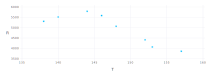

In [507]:
plot(data, x=:T, y=:R)

## b) Estimez les paramètres du modèle linéaire et calculez le $R^2$ ajusté

In [508]:
lm1 = fit(LinearModel, @formula(R ~ T), data)
β₀, β₁ = coef(lm1)

println("β₀ =  $β₀")
println("β₁ =  $β₁")

R² = r2(lm1)

println("R² = $R²")

β₀ =  19166.619402983026
β₁ =  -96.53731343282193
R² = 0.7341035339029551


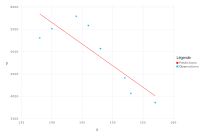

In [509]:
x = collect(minimum(data[:,:T]):maximum(data[:,:T]))
X = hcat(ones(length(x)),x)
ŷ = predict(lm1,X)

Gadfly.set_default_plot_size(20cm, 14cm)

predictions = layer(x=x, y=ŷ, Geom.line, Theme(default_color="red"))
observations = layer(data, x=:T, y=:R, Theme(default_color="deepskyblue"))

plot(predictions, observations, Guide.manual_color_key("Légende", ["Predictions", "Observations"], ["red","deepskyblue"]))


## c) Estimez les paramètres du modèle quadratique et calculez le $R^2$ ajusté

In [513]:
lm2 = fit(LinearModel, @formula(R ~ T+T^2), data)
β₀, β₁ = coef(lm1)

println("β₀ =  $β₀")
println("β₁ =  $β₁")

R² = r2(lm2)

println("R² = $R²")

β₀ =  19166.619402983026
β₁ =  -96.53731343282193
R² = 0.8823291376419911


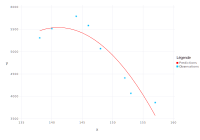

In [514]:
x = collect(minimum(data[:,:T]):maximum(data[:,:T]))
X = hcat(ones(length(x)),x,x.^2)
ŷ = predict(lm2,X)

Gadfly.set_default_plot_size(20cm, 14cm)

predictions = layer(x=x, y=ŷ, Geom.line, Theme(default_color="red"))
observations = layer(data, x=:T, y=:R, Theme(default_color="deepskyblue"))

plot(predictions, observations, Guide.manual_color_key("Légende", ["Predictions", "Observations"], ["red","deepskyblue"]))


## d) Estimez les paramètres du modèle cubique et calculez le $R^2$ ajusté

In [439]:
lm3 = fit(LinearModel, @formula(R ~ T^3), data)
β₀, β₁ = coef(lm1)

println("β₀ =  $β₀")
println("β₁ =  $β₁")

R² = r2(lm3)

println("R² = $R²")

β₀ =  19166.619402983026
β₁ =  -96.53731343282193
R² = 0.7581029891758342


In [440]:
varinfo(GLM)


| name                   |        size | summary                    |
|:---------------------- | -----------:|:-------------------------- |
| @formula               |     0 bytes | StatsModels.var"#@formula" |
| AbstractContrasts      |   176 bytes | DataType                   |
| AbstractTerm           |   176 bytes | DataType                   |
| Bernoulli              |    40 bytes | UnionAll                   |
| Binomial               |    40 bytes | UnionAll                   |
| CategoricalTerm        |   120 bytes | UnionAll                   |
| CauchitLink            |   176 bytes | DataType                   |
| CloglogLink            |   176 bytes | DataType                   |
| ConstantTerm           |    40 bytes | UnionAll                   |
| ContinuousTerm         |    40 bytes | UnionAll                   |
| ContrastsCoding        |   304 bytes | DataType                   |
| DummyCoding            |   256 bytes | DataType                   |
| EffectsCoding          |   256 bytes | DataType                   |
| FormulaTerm            |    80 bytes | UnionAll                   |
| FunctionTerm           |   120 bytes | UnionAll                   |
| GLM                    | 466.320 KiB | Module                     |
| Gamma                  |    40 bytes | UnionAll                   |
| GeneralizedLinearModel |   280 bytes | UnionAll                   |
| HelmertCoding          |   256 bytes | DataType                   |
| IdentityLink           |   176 bytes | DataType                   |
| InteractionTerm        |    40 bytes | UnionAll                   |
| InterceptTerm          |    40 bytes | UnionAll                   |
| InverseGaussian        |    40 bytes | UnionAll                   |
| InverseLink            |   176 bytes | DataType                   |
| InverseSquareLink      |   176 bytes | DataType                   |
| LinearModel            |   160 bytes | UnionAll                   |
| LogLink                |   176 bytes | DataType                   |
| LogitLink              |   176 bytes | DataType                   |
| MatrixTerm             |    80 bytes | UnionAll                   |
| ModelFrame             |    80 bytes | UnionAll                   |
| ModelMatrix            |    80 bytes | UnionAll                   |
| NegativeBinomial       |    40 bytes | UnionAll                   |
| NegativeBinomialLink   |   192 bytes | DataType                   |
| Normal                 |    40 bytes | UnionAll                   |
| Poisson                |    40 bytes | UnionAll                   |
| ProbitLink             |   176 bytes | DataType                   |
| RegressionModel        |   176 bytes | DataType                   |
| SqrtLink               |   176 bytes | DataType                   |
| StatisticalModel       |   176 bytes | DataType                   |
| StatsModels            | 861.027 KiB | Module                     |
| Term                   |   192 bytes | DataType                   |
| adjr2                  |     0 bytes | typeof(adjr2)              |
| adjr²                  |     0 bytes | typeof(adjr2)              |
| apply_schema           |     0 bytes | typeof(apply_schema)       |
| canonicallink          |     0 bytes | typeof(canonicallink)      |
| coef                   |     0 bytes | typeof(coef)               |
| coefnames              |     0 bytes | typeof(coefnames)          |
| coeftable              |     0 bytes | typeof(coeftable)          |
| concrete_term          |     0 bytes | typeof(concrete_term)      |
| confint                |     0 bytes | typeof(confint)            |
| deviance               |     0 bytes | typeof(deviance)           |
| devresid               |     0 bytes | typeof(devresid)           |
| dof                    |     0 bytes | typeof(dof)                |
| dof_residual           |     0 bytes | typeof(dof_residual)       |
| drop_term              |     0 bytes | typeof(drop_term)          |
| fit                    |     0 bytes | typeof(fit)                |
| fit!                   |     0 bytes | typeof(fit!)               |
| formula                |     0 bytes | typeof(formula)            |
| ftest                  |     0 bytes | typeof(ftest)              |
| glm                    |     0 bytes | typeof(glm)                |
| lag                    |     0 bytes | typeof(lag)                |
| lead                   |     0 bytes | typeof(lead)               |
| linpred                |     0 bytes | typeof(linpred)            |
| lm                     |     0 bytes | typeof(lm)                 |
| loglikelihood          |     0 bytes | typeof(loglikelihood)      |
| model_response         |     0 bytes | typeof(model_response)     |
| modelcols              |     0 bytes | typeof(modelcols)          |
| modelmatrix            |     0 bytes | typeof(modelmatrix)        |
| negbin                 |     0 bytes | typeof(negbin)             |
| nobs                   |     0 bytes | typeof(nobs)               |
| nulldeviance           |     0 bytes | typeof(nulldeviance)       |
| nullloglikelihood      |     0 bytes | typeof(nullloglikelihood)  |
| predict                |     0 bytes | typeof(predict)            |
| r2                     |     0 bytes | typeof(r2)                 |
| residuals              |     0 bytes | typeof(residuals)          |
| response               |     0 bytes | typeof(response)           |
| r²                     |     0 bytes | typeof(r2)                 |
| schema                 |     0 bytes | typeof(schema)             |
| setcontrasts!          |     0 bytes | typeof(setcontrasts!)      |
| stderror               |     0 bytes | typeof(stderror)           |
| term                   |     0 bytes | typeof(term)               |
| terms                  |     0 bytes | typeof(terms)              |
| vcov                   |     0 bytes | typeof(vcov)               |
| width                  |     0 bytes | typeof(width)              |


In [441]:
?r2

search: r2 star2 adjr2 rem2pi rad2deg



```
r2(obj::StatisticalModel)
r²(obj::StatisticalModel)
```

Coefficient of determination (R-squared).

For a linear model, the R² is defined as $ESS/TSS$, with $ESS$ the explained sum of squares and $TSS$ the total sum of squares.

---

```
r2(obj::StatisticalModel, variant::Symbol)
r²(obj::StatisticalModel, variant::Symbol)
```

Pseudo-coefficient of determination (pseudo R-squared).

For nonlinear models, one of several pseudo R² definitions must be chosen via `variant`. Supported variants are:

  * `:MacFadden` (a.k.a. likelihood ratio index), defined as $1 - \log (L)/\log (L_0)$;
  * `:CoxSnell`, defined as $1 - (L_0/L)^{2/n}$;
  * `:Nagelkerke`, defined as $(1 - (L_0/L)^{2/n})/(1 - L_0^{2/n})$.

In the above formulas, $L$ is the likelihood of the model, $L_0$ is the likelihood of the null model (the model with only an intercept), $n$ is the number of observations, $y_i$ are the responses, $\hat{y}_i$ are fitted values and $\bar{y}$ is the average response.

Cox and Snell's R² should match the classical R² for linear models.
